In [ ]:
%%writefile my_config.ini
[Filename]
prefix = 
dated_folder = 
directory = data
ext = csv
index = 
datetimeformat = %Y%m%d_%H%M%S

[Logging]
console = 1
console_level = WARNING
filename = test.log
file_level = DEBUG

[matplotlib.rcParams]
axes.axisbelow = True
axes.color_cycle = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.6980392156862745), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]
axes.edgecolor = 'white'
axes.facecolor = '#EAEAF2'
axes.grid = True
axes.labelcolor = '.15'
axes.labelsize = 11.0
axes.linewidth = 0.0
axes.titlesize = 12.0
figure.facecolor = 'white'
figure.figsize = [8.0, 5.5]
font.sans-serif = ['Arial', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
grid.color = 'white'
grid.linestyle = '-'
grid.linewidth = 1.0
image.cmap = 'Greys'
legend.fontsize = 10.0
legend.frameon = False
legend.numpoints = 1
legend.scatterpoints = 1
lines.linewidth = 1.75
lines.markeredgewidth = 0.0
lines.markersize = 7.0
lines.solid_capstyle = 'round'
patch.facecolor = (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
patch.linewidth = 0.3
text.color = '.15'
xtick.color = '.15'
xtick.direction = 'out'
xtick.labelsize = 10.0
xtick.major.pad = 7.0
xtick.major.size = 0.0
xtick.major.width = 1.0
xtick.minor.size = 0.0
ytick.color = '.15'
ytick.direction = 'out'
ytick.labelsize = 10.0
ytick.major.pad = 7.0
ytick.major.size = 0.0
ytick.major.width = 1.0
ytick.minor.size = 0.0

In [ ]:
%%writefile procedures.py
import random
from time import sleep

import logging
log = logging.getLogger('')
log.addHandler(logging.NullHandler())

from pymeasure.experiment import Procedure, IntegerParameter, Parameter, FloatParameter

class TestProcedure(Procedure):

    iterations = IntegerParameter('Loop Iterations', default=100)
    delay = FloatParameter('Delay Time', units='s', default=0.2)
    seed = Parameter('Random Seed', default='12345')

    DATA_COLUMNS = ['Iteration', 'Random Number']

    def startup(self):
        log.info("Setting up random number generator")
        random.seed(self.seed)

    def execute(self):
        log.info("Starting to generate numbers")
        for i in range(self.iterations):
            data = {
                'Iteration': i,
                'Random Number': random.random()
            }
            log.debug("Produced numbers: %s" % data)
            self.emit('results', data)
            self.emit('progress', 100.*i/self.iterations)
            sleep(self.delay)
            if self.should_stop():
                log.warning("Catch stop command in procedure")
                break

    def shutdown(self):
        log.info("Finished")

In [ ]:
%%writefile analysis.py
def add_offset(data, offset):
    return data['Random Number'] + offset

def analyse(data):
    data['Offset'] = add_offset(data, 1)
    return data

In [1]:
from pymeasure.experiment import Experiment
from procedures import TestProcedure
from analysis import analyse
%matplotlib inline

In [2]:
experiment = Experiment('test', TestProcedure(iterations=10, delay=.1))
experiment.analyse = analyse

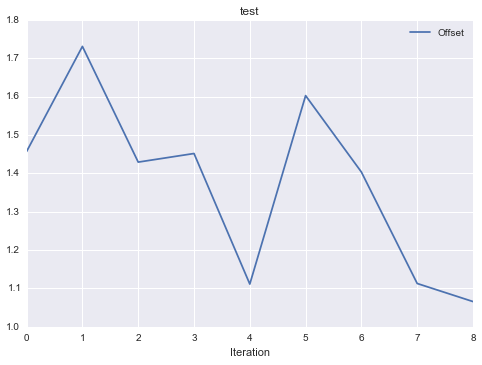

In [3]:
experiment.start()
experiment.plot_live('Iteration', 'Offset')